In [1]:
import geopandas as gpd
import numpy as np#studs['polygon_id']
import tqdm
from tqdm import tqdm
import pandas as pd

In [2]:
#source : https://www.lcps.org/Page/104702
f1 ="LCPS_Student_Geocodes_2019_2020.shp"
s1= "LCPS_Sites_Parcels_2019_2020.shp"
p1 = "LCPS_PlanningZones_2020_2021.shp"
os1 = "LCPS_Sites_2019_2020.shp"

### Students

In [3]:
data1 = gpd.read_file(f1)
print(data1.shape)

(84308, 71)


In [4]:
data1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 84308 entries, 0 to 84307
Data columns (total 71 columns):
OBJECTID_1    84308 non-null int64
ObjectID      84308 non-null int64
Status        84308 non-null object
Score         84308 non-null float64
Match_type    84308 non-null object
Match_addr    84308 non-null object
Addr_type     84308 non-null object
AddNum        84308 non-null object
Side          0 non-null object
StPreDir      3835 non-null object
StPreType     142 non-null object
StName        84308 non-null object
StType        20058 non-null object
StDir         9379 non-null object
StAddr        84308 non-null object
City          0 non-null object
County        0 non-null object
State         0 non-null object
StateAbbr     0 non-null object
ZIP           84308 non-null object
ZIP4          0 non-null object
ARC_Single    84308 non-null object
LOUD_ID       84308 non-null int64
ADDRESS       84308 non-null int64
ADDRESS_EX    1138 non-null object
ADDwEXT       1

In [5]:
#data1.info()    
#GRADE,GENDER,
#data1.ES_ZONES_2.value_counts()
df_students = data1[['OBJECTID_1','GRADE','GENDER','ETHNIC','LEP_FLAG', 'IEP_FLAG', 'FSI', 'ES_ZONES_2', 'MS_ZONES_2', 'HS_ZONES_2','geometry','SCHL_ID','STREET_NUM','SCHL_CODE']]
df_students.shape

(84308, 14)

In [6]:
df_students.head()

,OBJECTID_1,GRADE,GENDER,ETHNIC,LEP_FLAG,IEP_FLAG,FSI,ES_ZONES_2,MS_ZONES_2,HS_ZONES_2,geometry,SCHL_ID,STREET_NUM,SCHL_CODE
0,1,3,M,W,N,N,6,HRZ,SRM,DMH,POINT (11806041.15639168 7063437.719733),HRZ,47308,121
1,2,2,F,W,N,N,6,HRZ,SRM,DMH,POINT (11806736.16484417 7063734.643679842),HRZ,47384,121
2,3,4,F,W,N,Y,6,HRZ,SRM,DMH,POINT (11806736.16484417 7063734.643679842),HRZ,47384,121
3,4,13,F,A,N,N,6,HRZ,SRM,DMH,POINT (11806234.28658284 7063467.93883267),HRZ,47324,121
4,5,4,M,A,N,N,6,HRZ,SRM,DMH,POINT (11806234.28658284 7063467.93883267),HRZ,47324,121


In [7]:
#df_students.set_crs(epsg=4326 ,inplace=True, allow_override=True)

In [8]:
df_students.crs

<Projected CRS: EPSG:2924>
Name: NAD83(HARN) / Virginia North (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Virginia - SPCS - N
- bounds: (-80.06, 37.77, -76.51, 39.46)
Coordinate Operation:
- name: SPCS83 Virginia North zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
df_students.head()

,OBJECTID_1,GRADE,GENDER,ETHNIC,LEP_FLAG,IEP_FLAG,FSI,ES_ZONES_2,MS_ZONES_2,HS_ZONES_2,geometry,SCHL_ID,STREET_NUM,SCHL_CODE
0,1,3,M,W,N,N,6,HRZ,SRM,DMH,POINT (11806041.15639168 7063437.719733),HRZ,47308,121
1,2,2,F,W,N,N,6,HRZ,SRM,DMH,POINT (11806736.16484417 7063734.643679842),HRZ,47384,121
2,3,4,F,W,N,Y,6,HRZ,SRM,DMH,POINT (11806736.16484417 7063734.643679842),HRZ,47384,121
3,4,13,F,A,N,N,6,HRZ,SRM,DMH,POINT (11806234.28658284 7063467.93883267),HRZ,47324,121
4,5,4,M,A,N,N,6,HRZ,SRM,DMH,POINT (11806234.28658284 7063467.93883267),HRZ,47324,121


In [10]:
def grade2class(grade):
    CLASS = ""
    if(grade<=5):
        CLASS = 'ELEMENTARY'
    elif(5<grade<9):
        CLASS = "MIDDLE"
    else:
        CLASS = "HIGH"
    return CLASS
        

In [11]:
df_students['CLASS'] = df_students['GRADE'].apply(lambda x: grade2class(x))

/opt/anaconda3/envs/Git_regal_code/lib/python3.6/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [12]:
df_students['CLASS'].value_counts()

HIGH          33439
ELEMENTARY    30810
MIDDLE        20059
Name: CLASS, dtype: int64

In [13]:
df_students.head()

,OBJECTID_1,GRADE,GENDER,ETHNIC,LEP_FLAG,IEP_FLAG,FSI,ES_ZONES_2,MS_ZONES_2,HS_ZONES_2,geometry,SCHL_ID,STREET_NUM,SCHL_CODE,CLASS
0,1,3,M,W,N,N,6,HRZ,SRM,DMH,POINT (11806041.15639168 7063437.719733),HRZ,47308,121,ELEMENTARY
1,2,2,F,W,N,N,6,HRZ,SRM,DMH,POINT (11806736.16484417 7063734.643679842),HRZ,47384,121,ELEMENTARY
2,3,4,F,W,N,Y,6,HRZ,SRM,DMH,POINT (11806736.16484417 7063734.643679842),HRZ,47384,121,ELEMENTARY
3,4,13,F,A,N,N,6,HRZ,SRM,DMH,POINT (11806234.28658284 7063467.93883267),HRZ,47324,121,HIGH
4,5,4,M,A,N,N,6,HRZ,SRM,DMH,POINT (11806234.28658284 7063467.93883267),HRZ,47324,121,ELEMENTARY


### Planning_zones


In [14]:
planning_zone1 = gpd.read_file(p1)
print(planning_zone1.shape)
planning_zone1.crs

(453, 14)


<Projected CRS: EPSG:2924>
Name: NAD83(HARN) / Virginia North (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Virginia - SPCS - N
- bounds: (-80.06, 37.77, -76.51, 39.46)
Coordinate Operation:
- name: SPCS83 Virginia North zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
#planning_zone1.set_crs(epsg=4326 ,inplace=True, allow_override=True)

In [16]:
planning_zone1.crs

<Projected CRS: EPSG:2924>
Name: NAD83(HARN) / Virginia North (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Virginia - SPCS - N
- bounds: (-80.06, 37.77, -76.51, 39.46)
Coordinate Operation:
- name: SPCS83 Virginia North zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [17]:
planning_zone1.head()

,OBJECTID,COUNT_,STDYAREA,ELEM_,INT_,HIGH_,ELEM_CODE,INT_CODE,HIGH_CODE,DISTRICT,UTILITIES,SHAPE_Leng,SHAPE_Area,geometry
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,WOU,47261.233487,6.402673e+07,"POLYGON ((11725869.47421564 7152149.072493643,..."
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,WOU,43830.331606,6.803630e+07,"POLYGON ((11726805.14655688 7160565.438206807,..."
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,WOU,9218.417557,2.740530e+06,"POLYGON ((11720152.08637223 7099512.601323232,..."
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,WU,17952.941571,1.140931e+07,"POLYGON ((11694466.48485638 7097608.656640306,..."
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,WOU,95318.466542,2.940121e+08,"POLYGON ((11723040.92016147 7151907.866611227,..."


In [18]:
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
polygons = list(planning_zone1['geometry'][2:3])
u1 = cascaded_union(polygons)

In [19]:
df_planning2 = planning_zone1
#[['OBJECTID','STDYAREA','DISTRICT','ELEM_CODE','INT_CODE','HIGH_CODE','geometry']]

### Schools

In [20]:
onlysites_1 = gpd.read_file(os1)
print(onlysites_1.shape)
onlysites_1.info()

(108, 22)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 22 columns):
OBJECTID      108 non-null int64
SCH_CODE      108 non-null object
CLASS         108 non-null object
SCH_NUM       108 non-null int64
NAME          108 non-null object
DATE_OPENE    106 non-null object
BUILDING_D    108 non-null int64
CLASSROOMS    108 non-null int64
SPECIAL_SI    108 non-null int64
TRAILERS      108 non-null int64
SCHL_CODE     108 non-null int64
STRT_GRD      108 non-null int64
END_GRD       108 non-null int64
ELEM_         108 non-null int64
INT_          108 non-null int64
MID_          108 non-null int64
HIGH_         108 non-null int64
CAPACITY      108 non-null int64
PERM_CLRM     108 non-null int64
PORT_CLRM     108 non-null int64
BUILDING_S    108 non-null int64
geometry      108 non-null geometry
dtypes: geometry(1), int64(17), object(4)
memory usage: 18.6+ KB


In [21]:
#df_sites = onlysites_1[['SCH_CODE','CLASS','CAPACITY','geometry','STRT_GRD','END_GRD']]
onlysites_1 = onlysites_1[onlysites_1['CLASS'].isin(['ELEMENTARY','HIGH','MIDDLE'])]

In [22]:
onlysites_1.CLASS.value_counts()

ELEMENTARY    57
HIGH          18
MIDDLE        17
Name: CLASS, dtype: int64

In [23]:
#schools.set_crs(epsg=4326 ,inplace=True, allow_override=True)

In [24]:
onlysites_1.crs

<Projected CRS: EPSG:2924>
Name: NAD83(HARN) / Virginia North (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Virginia - SPCS - N
- bounds: (-80.06, 37.77, -76.51, 39.46)
Coordinate Operation:
- name: SPCS83 Virginia North zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [25]:
onlysites_1.head()

,OBJECTID,SCH_CODE,CLASS,SCH_NUM,NAME,DATE_OPENE,BUILDING_D,CLASSROOMS,SPECIAL_SI,TRAILERS,...,END_GRD,ELEM_,INT_,MID_,HIGH_,CAPACITY,PERM_CLRM,PORT_CLRM,BUILDING_S,geometry
1,2,MSE,ELEMENTARY,155,MOOREFIELD STATION ES,2013,46,48,0,0,...,5,155,0,0,0,1003,48,0,106894,POINT (11765618.43736847 7048564.330188483)
2,3,CTY,ELEMENTARY,111,COUNTRYSIDE ES,2003,39,40,0,0,...,5,111,0,0,0,815,40,0,85702,POINT (11791339.59294705 7064856.835333064)
3,4,HUT,ELEMENTARY,122,HUTCHISON FARM ES,2002,37,38,2,0,...,5,122,0,0,0,862,38,0,85305,POINT (11761074.0225728 7017323.602971897)
5,6,BUF,ELEMENTARY,152,BUFFALO TRAIL ES,2010,46,47,0,0,...,5,152,0,0,0,1039,47,0,107027,POINT (11754934.16411763 7012173.483350888)
6,7,LIN,ELEMENTARY,124,LINCOLN ES,1926,7,5,0,2,...,5,124,0,0,0,138,5,2,22356,POINT (11710835.44096355 7091440.446535811)


In [26]:
onlysites_1.CLASS.value_counts()

ELEMENTARY    57
HIGH          18
MIDDLE        17
Name: CLASS, dtype: int64

In [27]:
result = onlysites_1.to_json()
print(result)


{"type": "FeatureCollection", "features": [{"id": "1", "type": "Feature", "properties": {"BUILDING_D": 46, "BUILDING_S": 106894, "CAPACITY": 1003, "CLASS": "ELEMENTARY", "CLASSROOMS": 48, "DATE_OPENE": "2013", "ELEM_": 155, "END_GRD": 5, "HIGH_": 0, "INT_": 0, "MID_": 0, "NAME": "MOOREFIELD STATION ES", "OBJECTID": 2, "PERM_CLRM": 48, "PORT_CLRM": 0, "SCHL_CODE": 155, "SCH_CODE": "MSE", "SCH_NUM": 155, "SPECIAL_SI": 0, "STRT_GRD": -1, "TRAILERS": 0}, "geometry": {"type": "Point", "coordinates": [11765618.437368467, 7048564.330188483]}}, {"id": "2", "type": "Feature", "properties": {"BUILDING_D": 39, "BUILDING_S": 85702, "CAPACITY": 815, "CLASS": "ELEMENTARY", "CLASSROOMS": 40, "DATE_OPENE": "2003", "ELEM_": 111, "END_GRD": 5, "HIGH_": 0, "INT_": 0, "MID_": 0, "NAME": "COUNTRYSIDE ES", "OBJECTID": 3, "PERM_CLRM": 40, "PORT_CLRM": 0, "SCHL_CODE": 111, "SCH_CODE": "CTY", "SCH_NUM": 111, "SPECIAL_SI": 0, "STRT_GRD": -1, "TRAILERS": 0}, "geometry": {"type": "Point", "coordinates": [11791339

In [28]:
with open("schools_2019.json","w") as f:
    f.write(result)

In [29]:
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
# polygon1 = Polygon([(0, 0), (5, 3), (5, 0)])
# polygon2 = Polygon([(0, 0), (3, 10), (3, 0)])
#polygons = [polygon1, polygon2]
polygons = list(onlysites_1['geometry'][1:5])
u3 = cascaded_union(polygons)

### Site Parcel - Unused

In [30]:
siteparcel_1 = gpd.read_file(s1)
#print(siteshape_1.shape)
siteparcel_1.head()

siteparcel_1.CLASS.value_counts()
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
polygons2 = list(siteparcel_1['geometry'])
u2 = cascaded_union(polygons2)

In [31]:
x_site_parcel = siteparcel_1[siteparcel_1['CLASS'].isin(['ELEMENTARY','HIGH','MIDDLE'])]

In [32]:
x_site_parcel.CLASS.value_counts()

ELEMENTARY    55
HIGH          14
MIDDLE        13
Name: CLASS, dtype: int64

In [33]:
# # id  geometry
# from shapely.geometry import Point, Polygon

# df_students['polygon_id'] = df_students.apply(lambda _: '', axis=1)
# studs= df_students
# plan_area = df_planning
onlysites_1['polygon_id'] = onlysites_1.apply(lambda _: '', axis=1)
schl_sites = onlysites_1

In [70]:
schl_sites

,OBJECTID,SCH_CODE,CLASS,SCH_NUM,NAME,DATE_OPENE,BUILDING_D,CLASSROOMS,SPECIAL_SI,TRAILERS,...,ELEM_,INT_,MID_,HIGH_,CAPACITY,PERM_CLRM,PORT_CLRM,BUILDING_S,geometry,polygon_id
1,2,MSE,ELEMENTARY,155,MOOREFIELD STATION ES,2013,46,48,0,0,...,155,0,0,0,1003,48,0,106894,POINT (11765618.43736847 7048564.330188483),403
2,3,CTY,ELEMENTARY,111,COUNTRYSIDE ES,2003,39,40,0,0,...,111,0,0,0,815,40,0,85702,POINT (11791339.59294705 7064856.835333064),403
3,4,HUT,ELEMENTARY,122,HUTCHISON FARM ES,2002,37,38,2,0,...,122,0,0,0,862,38,0,85305,POINT (11761074.0225728 7017323.602971897),134
5,6,BUF,ELEMENTARY,152,BUFFALO TRAIL ES,2010,46,47,0,0,...,152,0,0,0,1039,47,0,107027,POINT (11754934.16411763 7012173.483350888),354
6,7,LIN,ELEMENTARY,124,LINCOLN ES,1926,7,5,0,2,...,124,0,0,0,138,5,2,22356,POINT (11710835.44096355 7091440.446535811),64
7,8,HLS,ELEMENTARY,120,HILLSIDE ES,1998,33,34,0,0,...,120,0,0,0,779,34,0,78892,POINT (11763042.76272981 7056336.043647647),82
8,9,LCH,HIGH,304,LOUDOUN COUNTY HS,1954,0,69,3,0,...,0,0,0,304,1361,69,0,209892,POINT (11744117.17098789 7088964.472157061),64
9,10,ALG,ELEMENTARY,102,ALGONKIAN ES,1989,32,33,0,0,...,102,0,0,0,658,33,0,66950,POINT (11792450.73540981 7069754.228425398),419
10,11,RBM,MIDDLE,208,RIVER BEND MS,2002,0,63,8,0,...,0,0,208,0,1216,63,0,162282,POINT (11795742.94503272 7068417.710429147),209
11,12,DMH,HIGH,302,DOMINION HS,2003,0,81,2,0,...,0,0,0,302,1423,81,0,252038,POINT (11802890.37037039 7058781.024321973),107


### PLOT

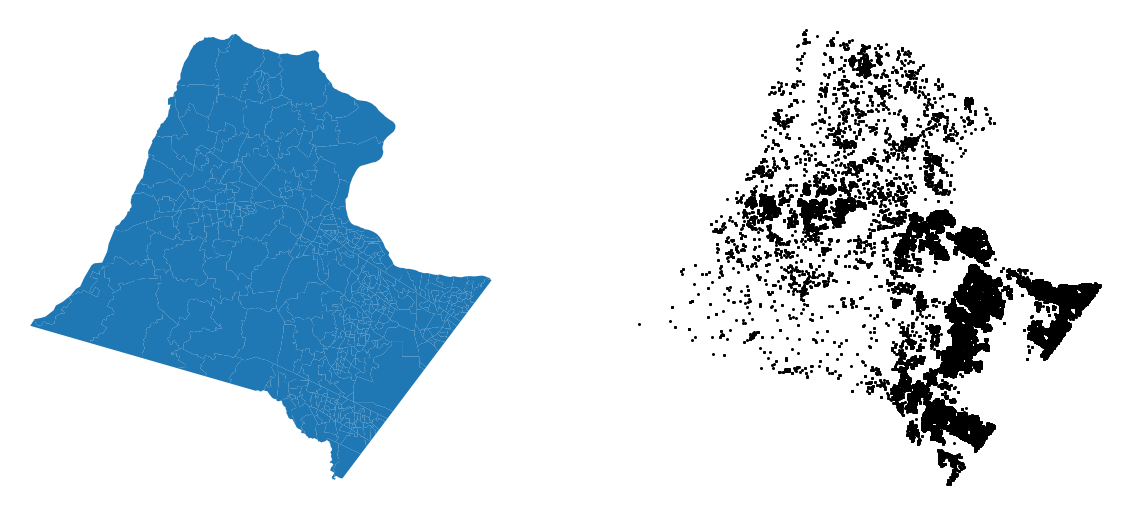

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 20))
planning_zone1.plot(ax=ax1)
df_students.plot(ax=ax2,color='black', markersize=4)
# f, ax = plt.subplots(1, figsize=(10, 10))
# ax = df_planning.plot(axes=ax)
# f, ay = plt.subplots(1, figsize=(10, 10))
# ay = df_students.plot(axes=ay)
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()


### Point inside polygon

In [36]:
# for j in tqdm(range(len(studs))):
#     for i in range(len(plan_area)):
#         if (studs['geometry'][j].within(plan_area['geometry'][i])):
#             studs['polygon_id'][j] = plan_area['OBJECTID'][i]

In [37]:
for jk in range(len(schl_sites)):
    for il in range(len(planning_zone1)):
        if (schl_sites['geometry'][jk].within(planning_zone1['geometry'][il])):
            schl_sites['polygon_id'].iloc[jk] = planning_zone1['OBJECTID'][il]

/opt/anaconda3/envs/Git_regal_code/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [72]:
schl_sites.head(50)

,OBJECTID,SCH_CODE,CLASS,SCH_NUM,NAME,DATE_OPENE,BUILDING_D,CLASSROOMS,SPECIAL_SI,TRAILERS,...,ELEM_,INT_,MID_,HIGH_,CAPACITY,PERM_CLRM,PORT_CLRM,BUILDING_S,geometry,polygon_id
1,2,MSE,ELEMENTARY,155,MOOREFIELD STATION ES,2013,46,48,0,0,...,155,0,0,0,1003,48,0,106894,POINT (11765618.43736847 7048564.330188483),403
2,3,CTY,ELEMENTARY,111,COUNTRYSIDE ES,2003,39,40,0,0,...,111,0,0,0,815,40,0,85702,POINT (11791339.59294705 7064856.835333064),403
3,4,HUT,ELEMENTARY,122,HUTCHISON FARM ES,2002,37,38,2,0,...,122,0,0,0,862,38,0,85305,POINT (11761074.0225728 7017323.602971897),134
5,6,BUF,ELEMENTARY,152,BUFFALO TRAIL ES,2010,46,47,0,0,...,152,0,0,0,1039,47,0,107027,POINT (11754934.16411763 7012173.483350888),354
6,7,LIN,ELEMENTARY,124,LINCOLN ES,1926,7,5,0,2,...,124,0,0,0,138,5,2,22356,POINT (11710835.44096355 7091440.446535811),64
7,8,HLS,ELEMENTARY,120,HILLSIDE ES,1998,33,34,0,0,...,120,0,0,0,779,34,0,78892,POINT (11763042.76272981 7056336.043647647),82
8,9,LCH,HIGH,304,LOUDOUN COUNTY HS,1954,0,69,3,0,...,0,0,0,304,1361,69,0,209892,POINT (11744117.17098789 7088964.472157061),64
9,10,ALG,ELEMENTARY,102,ALGONKIAN ES,1989,32,33,0,0,...,102,0,0,0,658,33,0,66950,POINT (11792450.73540981 7069754.228425398),419
10,11,RBM,MIDDLE,208,RIVER BEND MS,2002,0,63,8,0,...,0,0,208,0,1216,63,0,162282,POINT (11795742.94503272 7068417.710429147),209
11,12,DMH,HIGH,302,DOMINION HS,2003,0,81,2,0,...,0,0,0,302,1423,81,0,252038,POINT (11802890.37037039 7058781.024321973),107


In [69]:
result56 = schl_sites.to_json()
print(result56)

{"type": "FeatureCollection", "features": [{"id": "1", "type": "Feature", "properties": {"BUILDING_D": 46, "BUILDING_S": 106894, "CAPACITY": 1003, "CLASS": "ELEMENTARY", "CLASSROOMS": 48, "DATE_OPENE": "2013", "ELEM_": 155, "END_GRD": 5, "HIGH_": 0, "INT_": 0, "MID_": 0, "NAME": "MOOREFIELD STATION ES", "OBJECTID": 2, "PERM_CLRM": 48, "PORT_CLRM": 0, "SCHL_CODE": 155, "SCH_CODE": "MSE", "SCH_NUM": 155, "SPECIAL_SI": 0, "STRT_GRD": -1, "TRAILERS": 0, "polygon_id": 403}, "geometry": {"type": "Point", "coordinates": [11765618.437368467, 7048564.330188483]}}, {"id": "2", "type": "Feature", "properties": {"BUILDING_D": 39, "BUILDING_S": 85702, "CAPACITY": 815, "CLASS": "ELEMENTARY", "CLASSROOMS": 40, "DATE_OPENE": "2003", "ELEM_": 111, "END_GRD": 5, "HIGH_": 0, "INT_": 0, "MID_": 0, "NAME": "COUNTRYSIDE ES", "OBJECTID": 3, "PERM_CLRM": 40, "PORT_CLRM": 0, "SCHL_CODE": 111, "SCH_CODE": "CTY", "SCH_NUM": 111, "SPECIAL_SI": 0, "STRT_GRD": -1, "TRAILERS": 0, "polygon_id": 403}, "geometry": {"ty

In [71]:
with open("schools_2019_updated.json","w") as f:
    f.write(result56)

In [39]:
#studs.to_csv("pre_processed.csv")
#studs.head()

In [42]:
students = pd.read_csv("pre_processed.csv")

/opt/anaconda3/envs/Git_regal_code/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
students.head()

,Unnamed: 0,OBJECTID_1,GRADE,GENDER,ETHNIC,LEP_FLAG,IEP_FLAG,FSI,ES_ZONES_2,MS_ZONES_2,HS_ZONES_2,geometry,SCHL_ID,STREET_NUM,SCHL_CODE,CLASS,polygon_id
0,0,1,3,M,W,N,N,6,HRZ,SRM,DMH,POINT (11806041.15639168 7063437.719733),HRZ,47308,121,ELEMENTARY,138
1,1,2,2,F,W,N,N,6,HRZ,SRM,DMH,POINT (11806736.16484417 7063734.643679842),HRZ,47384,121,ELEMENTARY,138
2,2,3,4,F,W,N,Y,6,HRZ,SRM,DMH,POINT (11806736.16484417 7063734.643679842),HRZ,47384,121,ELEMENTARY,138
3,3,4,13,F,A,N,N,6,HRZ,SRM,DMH,POINT (11806234.28658284 7063467.93883267),HRZ,47324,121,HIGH,138
4,4,5,4,M,A,N,N,6,HRZ,SRM,DMH,POINT (11806234.28658284 7063467.93883267),HRZ,47324,121,ELEMENTARY,138


In [44]:
students_elementry = students[students['CLASS']=='ELEMENTARY']
students_high = students[students['CLASS']=='HIGH']
students_middle = students[students['CLASS']=='MIDDLE']

In [45]:
ELEM_POP = students_elementry.groupby(['polygon_id'])['OBJECTID_1'].count()
HIGH_POP = students_high.groupby(['polygon_id'])['OBJECTID_1'].count()
MID_POP  = students_middle.groupby(['polygon_id'])['OBJECTID_1'].count()

In [46]:
df_e = pd.DataFrame(ELEM_POP)
df_e.reset_index(inplace =True)
df_e = df_e.rename(columns={'OBJECTID_1': 'ELEM_POP','polygon_id': 'OBJECTID'})

In [47]:
df_h = pd.DataFrame(HIGH_POP)
df_h.reset_index(inplace =True)
df_h = df_h.rename(columns={'OBJECTID_1': 'HIGH_POP','polygon_id': 'OBJECTID'})

In [48]:
df_m = pd.DataFrame(MID_POP)
df_m.reset_index(inplace =True)
df_m = df_m.rename(columns={'OBJECTID_1': 'MID_POP','polygon_id': 'OBJECTID'})

In [49]:
test_merged1 = pd.merge(df_planning2, df_e, how="left", on=["OBJECTID"])
test_merged2 = pd.merge(test_merged1, df_h, how="left", on=["OBJECTID"])
test_merged3 = pd.merge(test_merged2, df_m, how="left", on=["OBJECTID"])


In [50]:
test_merged3.head()

,OBJECTID,COUNT_,STDYAREA,ELEM_,INT_,HIGH_,ELEM_CODE,INT_CODE,HIGH_CODE,DISTRICT,UTILITIES,SHAPE_Leng,SHAPE_Area,geometry,ELEM_POP,HIGH_POP,MID_POP
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,WOU,47261.233487,6.402673e+07,"POLYGON ((11725869.47421564 7152149.072493643,...",26.0,18.0,12.0
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,WOU,43830.331606,6.803630e+07,"POLYGON ((11726805.14655688 7160565.438206807,...",31.0,46.0,15.0
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,WOU,9218.417557,2.740530e+06,"POLYGON ((11720152.08637223 7099512.601323232,...",10.0,6.0,3.0
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,WU,17952.941571,1.140931e+07,"POLYGON ((11694466.48485638 7097608.656640306,...",116.0,99.0,60.0
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,WOU,95318.466542,2.940121e+08,"POLYGON ((11723040.92016147 7151907.866611227,...",65.0,82.0,36.0


In [51]:
#Final SPA_2019
test_merged3.shape

(453, 17)

In [52]:
result3 = test_merged3.to_json()
print(result3)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [53]:
with open("SPA_2019.json","w") as f:
    f.write(result3)

### Calculations on Target students

In [54]:
target = students_elementry

In [55]:
target.shape

(30810, 17)

In [56]:
tg = target.groupby(['polygon_id','GENDER'])['OBJECTID_1'].count()
tg[0:5]

polygon_id  GENDER
1           F         16
            M         10
2           F         18
            M         13
3           F          3
Name: OBJECTID_1, dtype: int64

In [57]:
tp = target.groupby(['polygon_id'])['OBJECTID_1'].count()
tp[0:10]

polygon_id
1      26
2      31
3      10
4     116
5      65
6      11
7       3
8      25
9      18
10     29
Name: OBJECTID_1, dtype: int64

### Entropy

In [58]:
# (tg/tp)[0:10]
ethinic_elem_all = target.groupby('ETHNIC')['OBJECTID_1'].count()
k = ethinic_elem_all/np.sum(ethinic_elem_all[:,])
total_l = k * np.log(k)
total_l_val = np.sum(total_l)
total_l_val

-1.4076655483185332

In [59]:
te = target.groupby(['polygon_id','ETHNIC'])['OBJECTID_1'].count()
te[0:10]

polygon_id  ETHNIC
1           B          1
            H          7
            W         18
2           H          6
            M2         4
            W         21
3           B          2
            H          4
            W          4
4           A          3
Name: OBJECTID_1, dtype: int64

In [60]:
Ei = ((te/tp)*np.log(te/tp))
Ei[0:4]

polygon_id  ETHNIC
1           B        -0.125311
            H        -0.353281
            W        -0.254579
2           H        -0.317851
Name: OBJECTID_1, dtype: float64

In [61]:
Sum_Ethnic_id = Ei.groupby('polygon_id').sum()
Sum_Ethnic_id[0:3]

polygon_id
1   -0.733171
2   -0.845900
3   -1.054920
Name: OBJECTID_1, dtype: float64

In [62]:
H = (Sum_Ethnic_id - total_l_val)*tp/(total_l_val*np.sum(tp[:]))

In [63]:
np.sum(H[:])

-0.20760107003615236

### Checking number of schools assigned to each SPA

In [64]:
tsc = target.groupby(['polygon_id'])['SCHL_CODE'].nunique()
tsc[0:10]

polygon_id
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: SCHL_CODE, dtype: int64

### Groupby MealProgram

In [65]:
tfsi = target.groupby(['polygon_id','FSI'])['OBJECTID_1'].count()
tfsi[0:10]

polygon_id  FSI
1           1       4
            6      22
2           1       4
            2       1
            6      26
3           1       4
            2       2
            6       4
4           1       7
            2       1
Name: OBJECTID_1, dtype: int64

In [66]:
from joblib import Parallel, delayed
def process(i):
    return i * i

results = Parallel(n_jobs=4)(delayed(process)(i) for i in range(10))
print(results)  # prints [0, 1, 4, 9, 16, 25, 36, 49, 64, 81

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


## THE END

In [67]:
#df_students.to_csv("students_2019.csv")
# data1.ES_ZONES_2.value_counts()

#
# df_site_parcel = siteshape_1[['geometry','CLASS','SCH_CODE']]
# df_site_parcel.shape

#siteshape_1 = gpd.read_file(s1)
#print(siteshape_1.shape)
#siteshape_1.head()

# siteshape_1.CLASS.value_counts()
# from shapely.geometry import Polygon
# from shapely.ops import cascaded_union
# polygons2 = list(siteshape_1['geometry'])
# u2 = cascaded_union(polygons2)